## CSE-221710309053-Hari Sarmishta

# Classification of Liver Diseases

### Problem Statement:
Patients with Liver disease have been continuously increasing because of excessive consumption of alcohol, inhale of harmful gases, intake of contaminated food, pickles and drugs. This dataset was used to evaluate prediction algorithms in an effort to reduce burden on doctors.

### Content:
This data set contains 416 liver patient records and 167 non liver patient records collected from North East of Andhra Pradesh, India. The "Dataset" column is a class label used to divide groups into liver patient (liver disease) or not (no disease). This data set contains 441 male patient records and 142 female patient records.

Any patient whose age exceeded 89 is listed as being of age "90".

### Features:
* Age of the patient
* Gender of the patient
* Total Bilirubin
* Direct Bilirubin
* Alkaline Phosphotase
* Alamine Aminotransferase
* Aspartate Aminotransferase
* Total Protiens
* Albumin
* Albumin and Globulin Ratio
* Dataset: field used to split the data into two sets (patient with liver disease, or no disease)

The DataSet was downloaded from the below Kaggle Repository.

https://www.kaggle.com/uciml/indian-liver-patient-records

Here are the steps I'm going to perform:  
1) Data Analysis: This is in general looking at the data to figure out whats going on. Inspect the data: Check whether there is any missing data, irrelevant data and do a cleanup.  
2) Data Visualization:   
3) Feature selection.  
4) Search for any trends, relations & correlations.  
5) Draw an inference and predict whether the patient can be identified to be having liver disease or not  

### Importing the Libraries

In [1]:
#Import all required libraries for reading data, analysing and visualizing data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

# Data Analysis

### Importing the Data Set

In [2]:
#Reading the data (Training & Test)
liver_df = pd.read_csv('classification_of_liver_diseases.csv')

This data set contains 416 liver patient records and 167 non liver patient records collected from North East of Andhra Pradesh, India. The "Dataset" column is a class label used to divide groups into liver patient (liver disease) or not (no disease). 

In [3]:
liver_df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
liver_df.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


In [5]:
# should help us to locate if there are any missing or null values
liver_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
Age                           583 non-null int64
Gender                        583 non-null object
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    579 non-null float64
Dataset                       583 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


###### The column Albumin_and_Globulin_Ratio doesnot have 583 values so we need to correct this in the data preprocessing stage.

#### Now I would like to check if the data is balanced or not by plotting a histogram

Text(0, 0.5, 'Frequency')

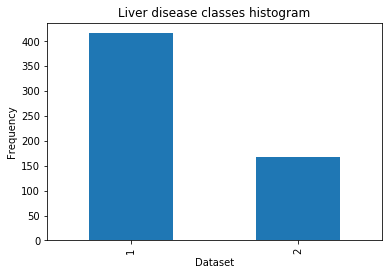

In [6]:
# checking the stats from the kaggle 416 liver disease patients and 167 non liver disease patients
# need to remap the classes liver disease:=1 and no liver disease:=0 (normal convention to be followed)
count_classes = pd.value_counts(liver_df['Dataset'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Liver disease classes histogram")
plt.xlabel("Dataset")
plt.ylabel("Frequency")

###### Check from the Kaggle: 416 liver disease patients and 167 normal patients

In [7]:
liver_df['Dataset'].value_counts()

1    416
2    167
Name: Dataset, dtype: int64

### Statistical Analysis

In [8]:
#Describe gives statistical information about NUMERICAL columns in the dataset
liver_df.describe(include='all')
#We can see that there are missing values for Albumin_and_Globulin_Ratio as only 579 entries have valid values indicating 4 missing values.
#Gender has only 2 values - Male/Female

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,44.746141,NaN,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,NaN,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,NaN,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,NaN,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,NaN,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,NaN,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000


In [9]:
liver_df.shape

(583, 11)

### Data Set Features

In [10]:
#Which features are available in the dataset?
liver_df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [11]:
#Check for any null values
liver_df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

The only data that is null is the Albumin_and_Globulin_Ratio - Only 4 rows are null. Lets see whether this is an important feature    

# Data Visualization

### Identifying Missing Values

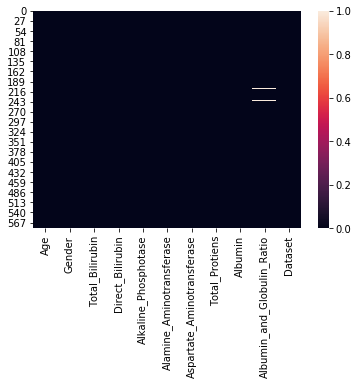

In [12]:
# Visualizing the missing values with heatmap
sns.heatmap(liver_df.isna())

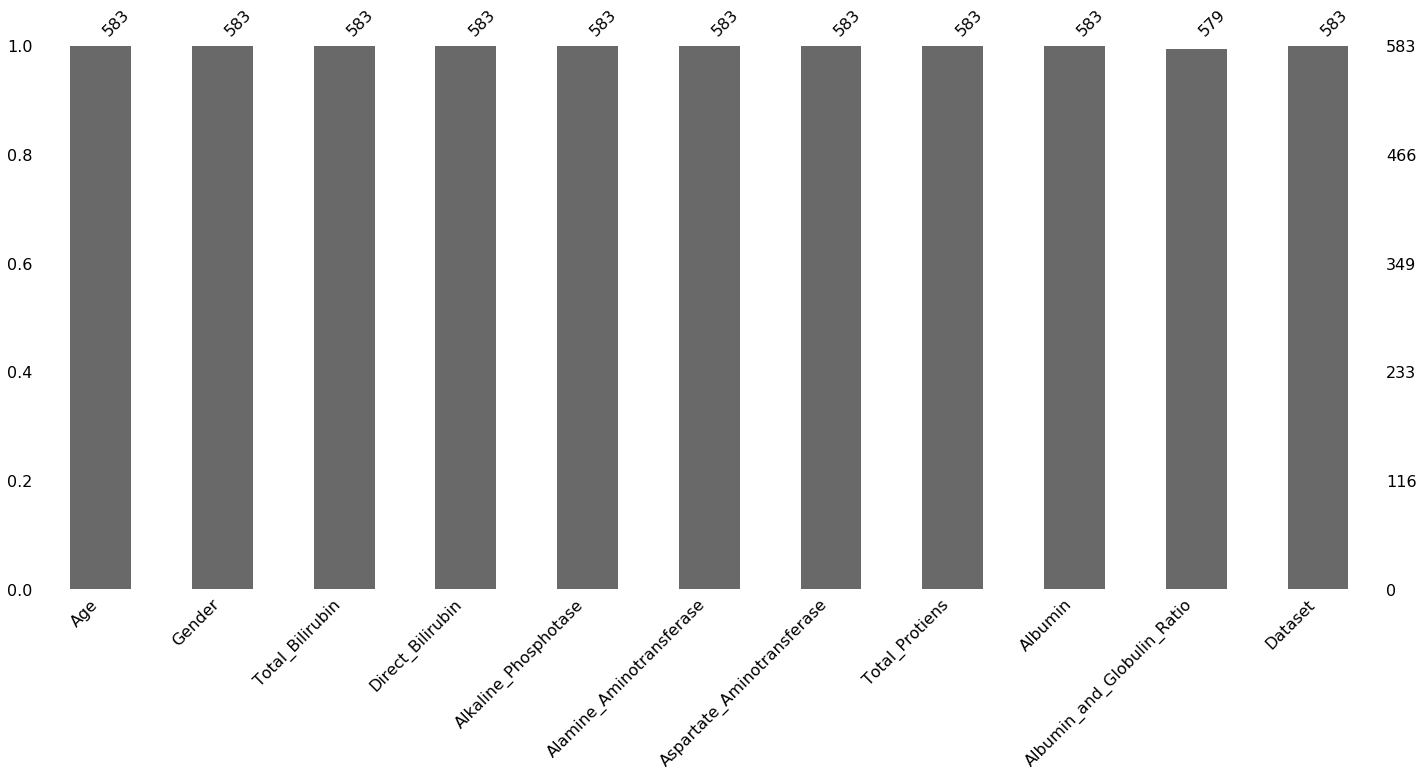

In [13]:
## missingno--> It's specially used for checking(visualizing) the missing values
import missingno as msno
msno.bar(liver_df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D9709DEB00>,
      dtype=object)

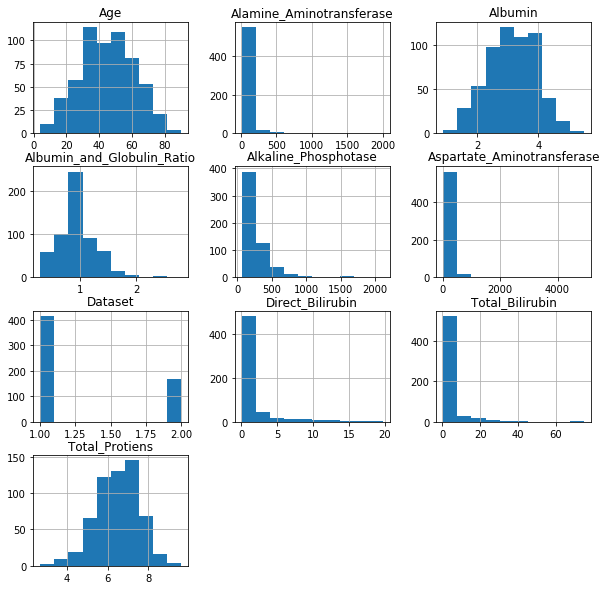

In [14]:
liver_df.hist(figsize=(10,10))

Number of patients diagnosed with liver disease:  416
Number of patients not diagnosed with liver disease:  167


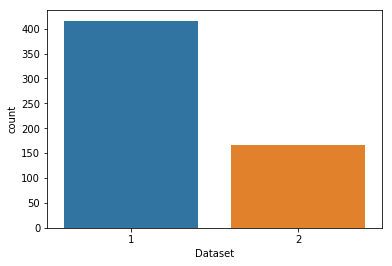

In [15]:
# To check the countplot of the Dataset column
sns.countplot(data=liver_df, x = 'Dataset', label='Count')

LD, NLD = liver_df['Dataset'].value_counts()
print('Number of patients diagnosed with liver disease: ',LD)
print('Number of patients not diagnosed with liver disease: ',NLD)

Number of patients that are male:  441
Number of patients that are female:  142


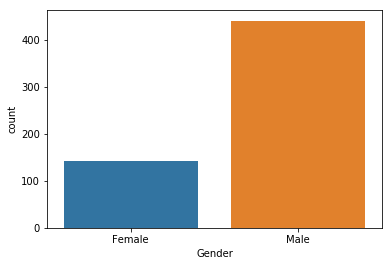

In [16]:
#To check the countplot of Gender column
sns.countplot(data=liver_df, x = 'Gender', label='Count')

M, F = liver_df['Gender'].value_counts()
print('Number of patients that are male: ',M)
print('Number of patients that are female: ',F)

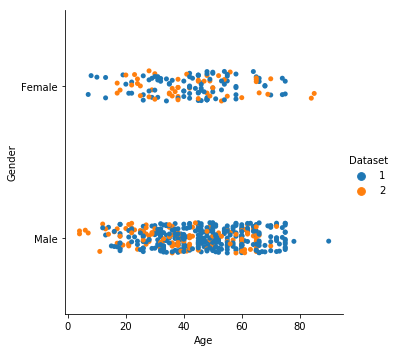

In [17]:
sns.catplot(x="Age", y="Gender", hue="Dataset", data=liver_df);

Age seems to be a factor for liver disease for both male and female genders

In [18]:
liver_df[['Gender', 'Dataset','Age']].groupby(['Dataset','Gender'], 
                                              as_index=False).count().sort_values(by='Dataset', ascending=False)

,Dataset,Gender,Age
2,2,Female,50
3,2,Male,117
0,1,Female,92
1,1,Male,324


In [19]:
liver_df[['Gender', 'Dataset','Age']].groupby(['Dataset','Gender'], 
                                              as_index=False).mean().sort_values(by='Dataset', ascending=False)

,Dataset,Gender,Age
2,2,Female,42.740000
3,2,Male,40.598291
0,1,Female,43.347826
1,1,Male,46.950617


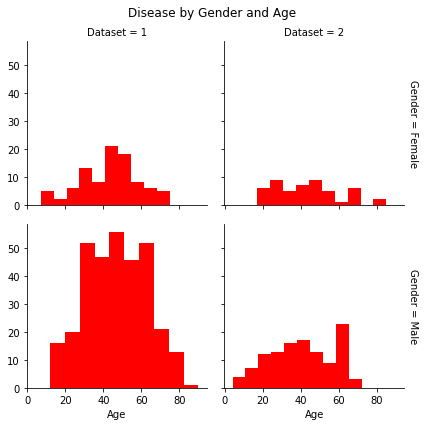

In [20]:
g = sns.FacetGrid(liver_df, col="Dataset", row="Gender", margin_titles=True)
g.map(plt.hist, "Age", color="red")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Disease by Gender and Age');

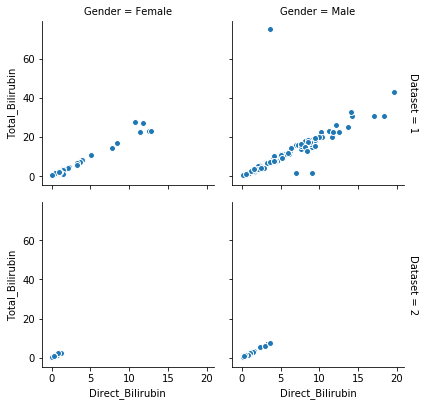

In [21]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Direct_Bilirubin", "Total_Bilirubin", edgecolor="w")
plt.subplots_adjust(top=0.9)

There seems to be direct relationship between Total_Bilirubin and Direct_Bilirubin. We have the possibility of removing one of this feature.

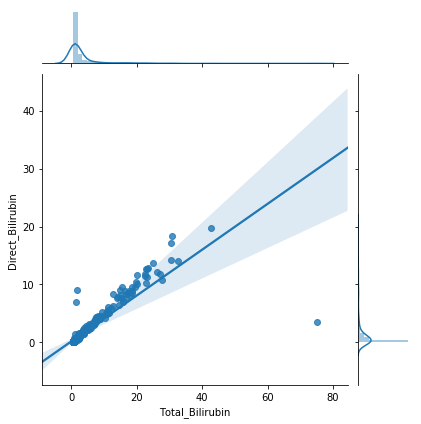

In [22]:
sns.jointplot("Total_Bilirubin", "Direct_Bilirubin", data=liver_df, kind="reg")

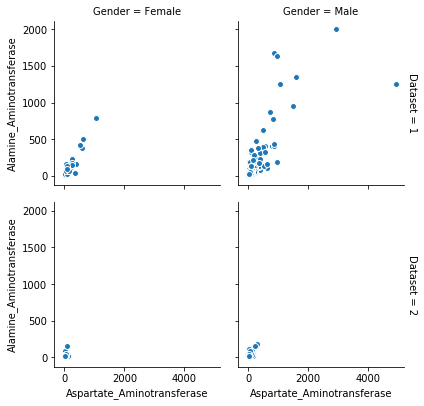

In [23]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Aspartate_Aminotransferase", "Alamine_Aminotransferase",  edgecolor="w")
plt.subplots_adjust(top=0.9)

There is linear relationship between Aspartate_Aminotransferase and Alamine_Aminotransferase and the gender. We have the possibility of removing one of this feature.

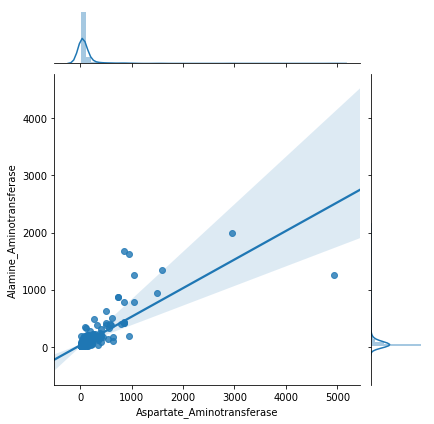

In [24]:
sns.jointplot("Aspartate_Aminotransferase", "Alamine_Aminotransferase", 
              data=liver_df, kind="reg")

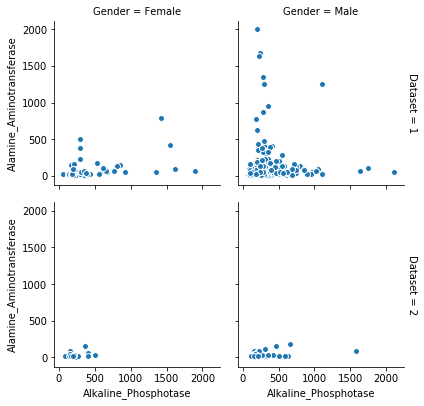

In [25]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Alkaline_Phosphotase", "Alamine_Aminotransferase",  edgecolor="w")
plt.subplots_adjust(top=0.9)

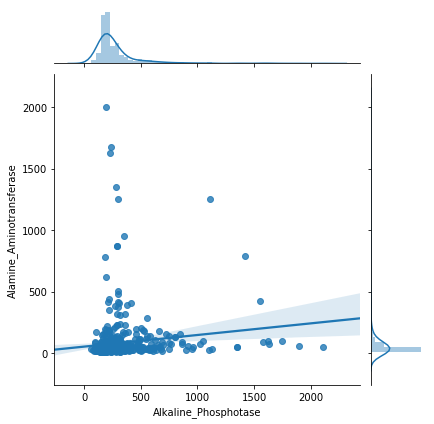

In [26]:
sns.jointplot("Alkaline_Phosphotase", "Alamine_Aminotransferase", 
              data=liver_df, kind="reg")

No linear correlation between Alkaline_Phosphotase and Alamine_Aminotransferase

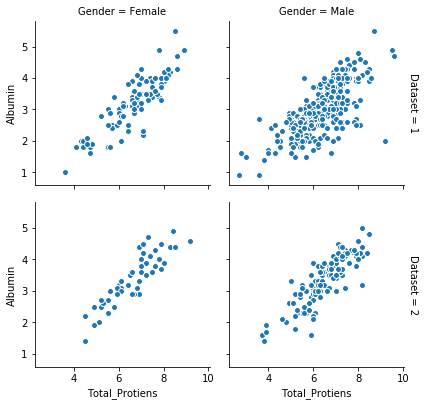

In [27]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Total_Protiens", "Albumin",  edgecolor="w")
plt.subplots_adjust(top=0.9)

There is linear relationship between Total_Protiens and Albumin and the gender. We have the possibility of removing one of this feature.

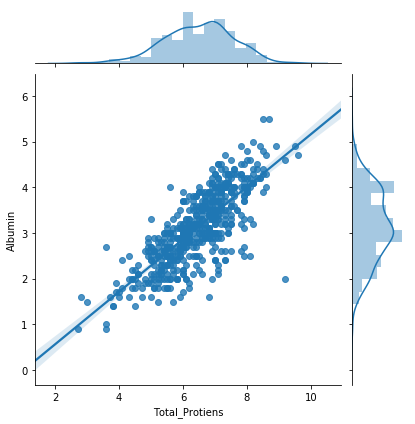

In [28]:
sns.jointplot("Total_Protiens", "Albumin", data=liver_df, kind="reg")

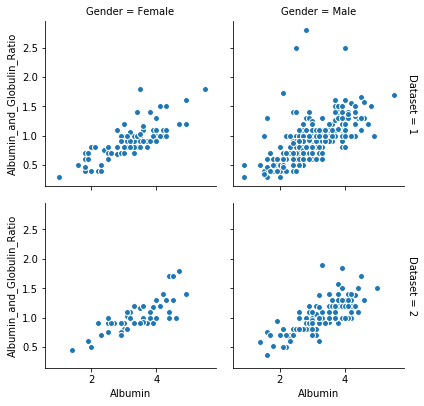

In [29]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Albumin", "Albumin_and_Globulin_Ratio",  edgecolor="w")
plt.subplots_adjust(top=0.9)

There is linear relationship between Albumin_and_Globulin_Ratio and Albumin. We have the possibility of removing one of this feature.

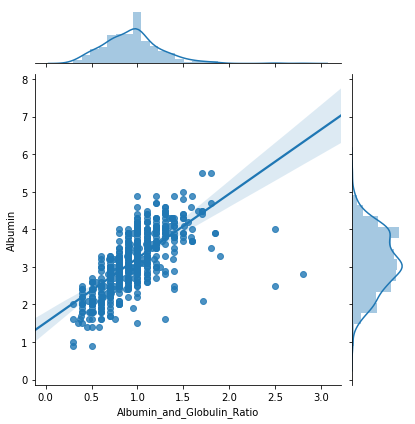

In [30]:
sns.jointplot("Albumin_and_Globulin_Ratio", "Albumin", data=liver_df, kind="reg")

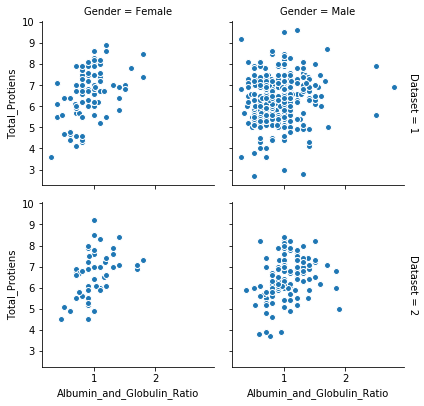

In [31]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Albumin_and_Globulin_Ratio", "Total_Protiens",  edgecolor="w")
plt.subplots_adjust(top=0.9)

## Overall Observation:

From the above jointplots and scatterplots, we find direct relationship between the following features:  
Direct_Bilirubin & Total_Bilirubin  
Aspartate_Aminotransferase & Alamine_Aminotransferase  
Total_Protiens & Albumin  
Albumin_and_Globulin_Ratio & Albumin  

Hence, we can very well find that we can omit one of the features. I'm going to keep the follwing features:  
Total_Bilirubin  
Alamine_Aminotransferase  
Total_Protiens  
Albumin_and_Globulin_Ratio  
Albumin  

In [32]:
liver_df.head(3)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1


Convert categorical variable "Gender" to indicator variables

In [33]:
pd.get_dummies(liver_df['Gender'], prefix = 'Gender').head()

,Gender_Female,Gender_Male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1


In [34]:
liver_df = pd.concat([liver_df,pd.get_dummies(liver_df['Gender'], prefix = 'Gender')], axis=1)

In [35]:
liver_df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Female,Gender_Male
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1,1,0
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1,0,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1,0,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1,0,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1,0,1


In [36]:
liver_df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Female,Gender_Male
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000,583.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449,0.243568,0.756432
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490,0.429603,0.429603
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000,0.000000,0.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000,0.000000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000,0.000000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000,0.000000,1.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000,1.000000,1.000000


In [37]:
liver_df[liver_df['Albumin_and_Globulin_Ratio'].isnull()]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Female,Gender_Male
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1,1,0
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1,0,1
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN,2,1,0
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,2,0,1


In [38]:
liver_df["Albumin_and_Globulin_Ratio"] = liver_df.Albumin_and_Globulin_Ratio.fillna(liver_df['Albumin_and_Globulin_Ratio'].mean())

In [39]:
# The input variables/features are all the inputs except Dataset. 
# The prediction or label is 'Dataset' that determines whether the patient has liver disease or not. 
X = liver_df.drop(['Gender','Dataset'], axis=1)
X.head(3)

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender_Female,Gender_Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,0,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,0,1


In [40]:
y = liver_df['Dataset'] # 1 for liver disease; 2 for no liver disease

In [41]:
# Correlation
liver_corr = X.corr()

In [42]:
liver_corr

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender_Female,Gender_Male
Age,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216089,-0.056560,0.056560
Total_Bilirubin,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206159,-0.089291,0.089291
Direct_Bilirubin,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200004,-0.100436,0.100436
Alkaline_Phosphotase,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.233960,0.027496,-0.027496
Alamine_Aminotransferase,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002374,-0.082332,0.082332
Aspartate_Aminotransferase,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070024,-0.080336,0.080336
Total_Protiens,-0.187461,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.233904,0.089121,-0.089121
Albumin,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.686322,0.093799,-0.093799
Albumin_and_Globulin_Ratio,-0.216089,-0.206159,-0.200004,-0.233960,-0.002374,-0.070024,0.233904,0.686322,1.000000,0.003404,-0.003404
Gender_Female,-0.056560,-0.089291,-0.100436,0.027496,-0.082332,-0.080336,0.089121,0.093799,0.003404,1.000000,-1.000000


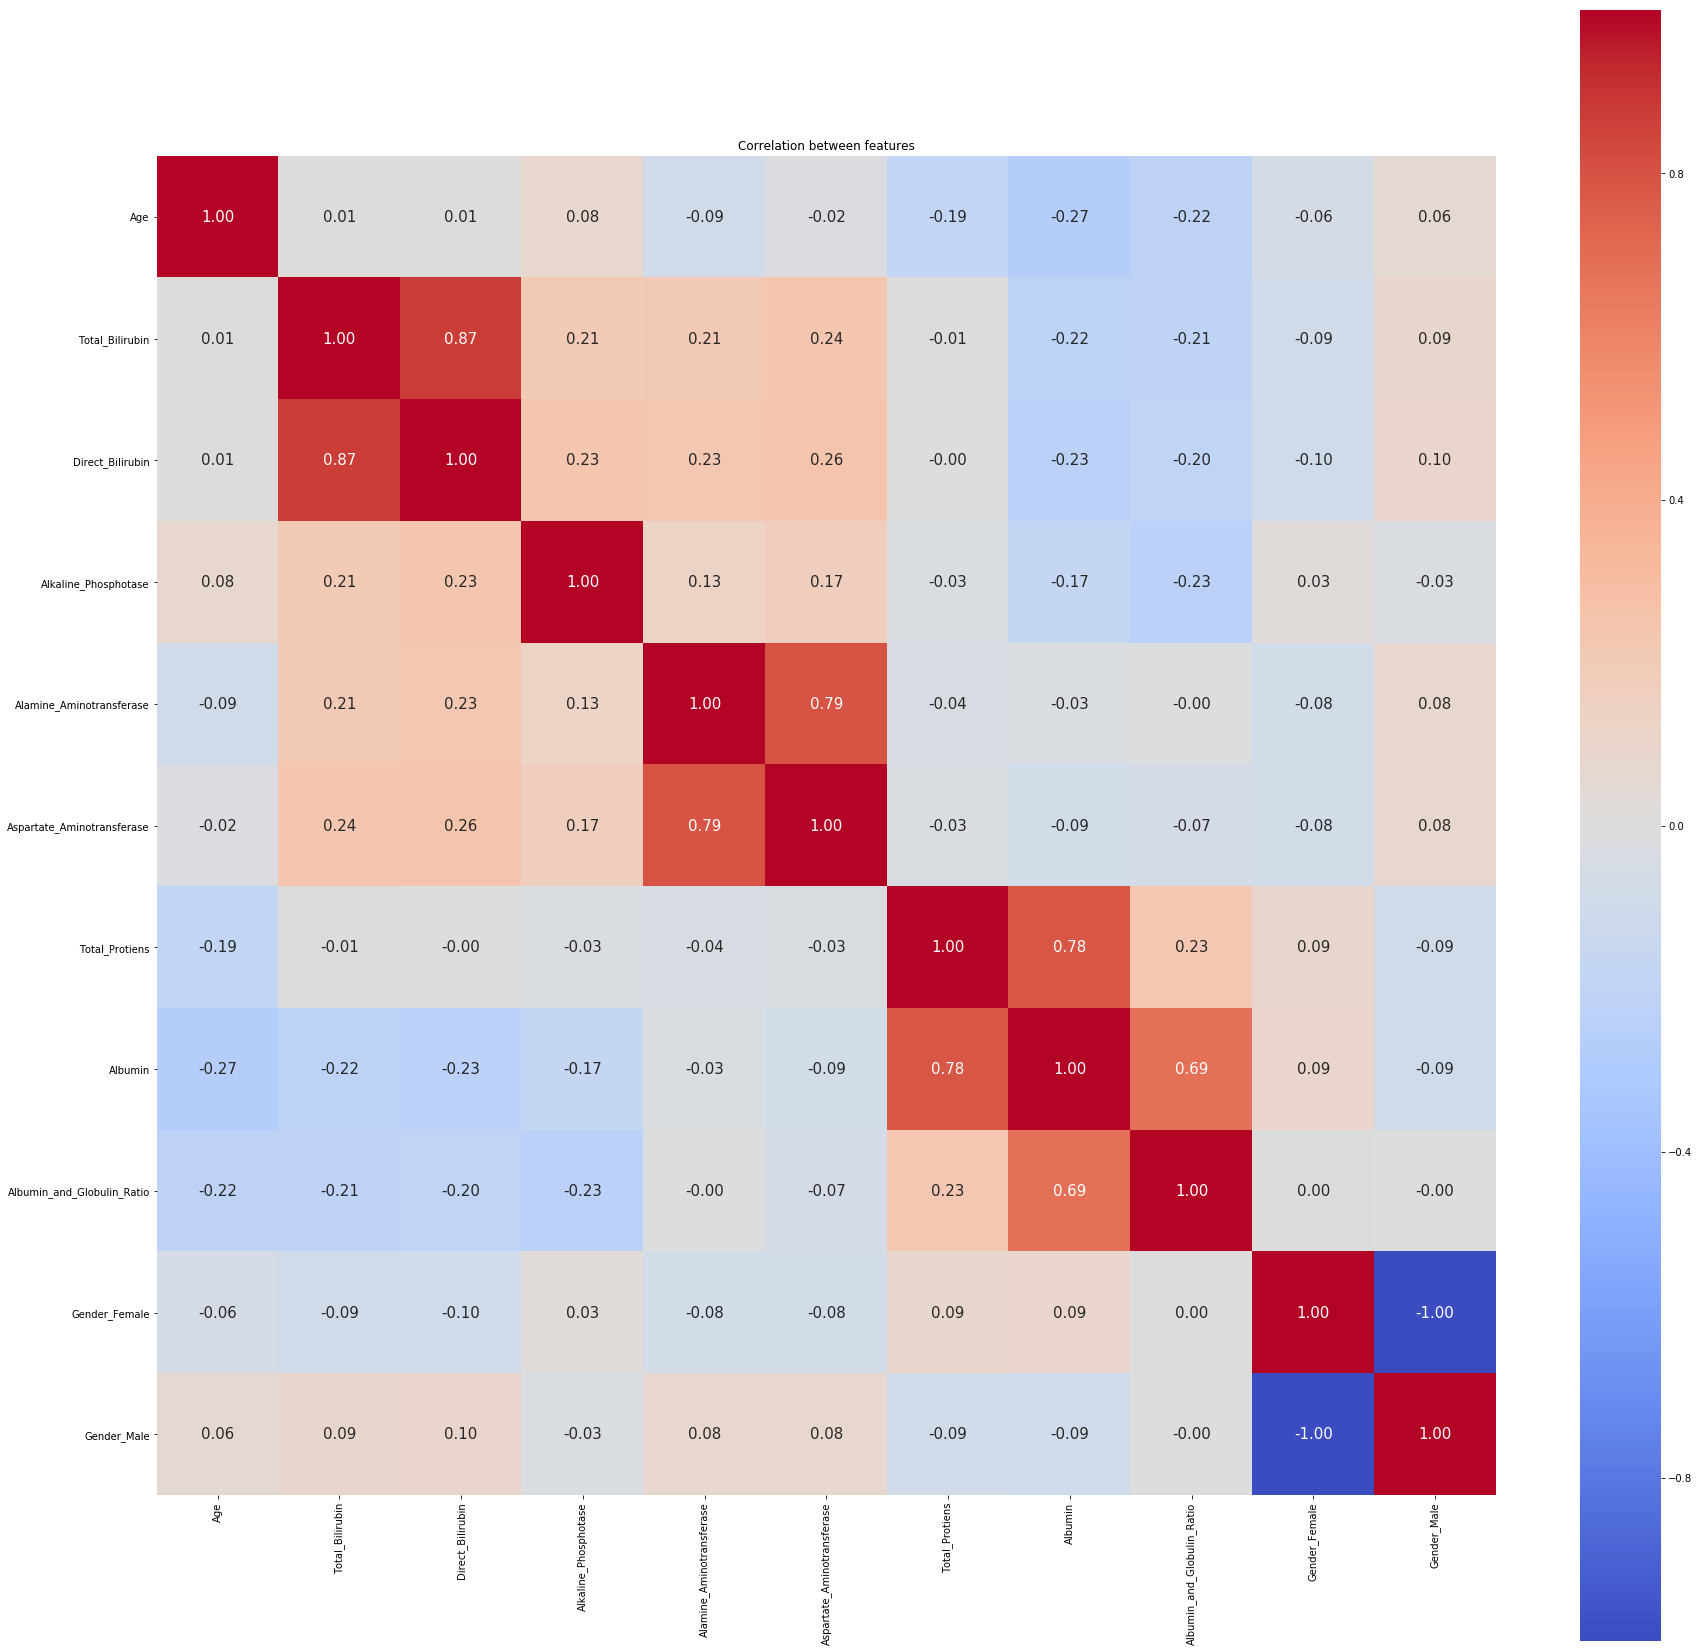

In [43]:
plt.figure(figsize=(30, 30))
sns.heatmap(liver_corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           cmap= 'coolwarm')
plt.title('Correlation between features');

### The above correlation also indicates the following correlation
* Total_Protiens & Albumin
* Alamine_Aminotransferase & Aspartate_Aminotransferase
* Direct_Bilirubin & Total_Bilirubin
* There is some correlation between Albumin_and_Globulin_Ratio and Albumin. But its not as high as Total_Protiens & Albumin

# Machine Learning

In [44]:
# Importing modules
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,f1_score
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=111)
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(349, 11)
(349,)
(234, 11)
(234,)


### Building First Model using Logistic Regression

Logistic Regression Training Score: 
 71.63
Logistic Regression Test Score: 
 69.66
Coefficient: 
 [[-1.38864503e-02  1.49987013e-01 -6.40184824e-01 -4.74249185e-04
  -1.25183763e-02 -1.87307568e-03 -7.22487424e-02  2.82957445e-01
   1.52715449e-02  2.51359045e-01 -4.67555325e-02]]
Intercept: 
 [0.2155177]
Accuracy: 
 0.6965811965811965
Confusion Matrix: 
 [[153  12]
 [ 59  10]]
Classification Report: 
               precision    recall  f1-score   support

           1       0.72      0.93      0.81       165
           2       0.45      0.14      0.22        69

    accuracy                           0.70       234
   macro avg       0.59      0.54      0.52       234
weighted avg       0.64      0.70      0.64       234



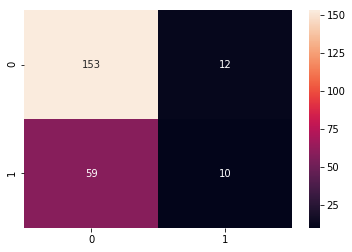

In [46]:
# Create logistic regression object
logreg = LogisticRegression()
# Train the model using the training sets and check score
logreg.fit(X_train, y_train)
#Predict Output
log_predicted= logreg.predict(X_test)

logreg_score = round(logreg.score(X_train, y_train) * 100, 2)
logreg_score_test = round(logreg.score(X_test, y_test) * 100, 2)
logreg_acc = accuracy_score(y_test,log_predicted)
#Equation coefficient and Intercept
print('Logistic Regression Training Score: \n', logreg_score)
print('Logistic Regression Test Score: \n', logreg_score_test)
print('Coefficient: \n', logreg.coef_)
print('Intercept: \n', logreg.intercept_)
print('Accuracy: \n', logreg_acc)
print('Confusion Matrix: \n', confusion_matrix(y_test,log_predicted))
print('Classification Report: \n', classification_report(y_test,log_predicted))

sns.heatmap(confusion_matrix(y_test,log_predicted),annot=True,fmt="d")


In [47]:
coeff_df = pd.DataFrame(X.columns)
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])
pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
7,Albumin,0.282957
9,Gender_Female,0.251359
1,Total_Bilirubin,0.149987
8,Albumin_and_Globulin_Ratio,0.015272
3,Alkaline_Phosphotase,-0.000474
5,Aspartate_Aminotransferase,-0.001873
4,Alamine_Aminotransferase,-0.012518
0,Age,-0.013886
10,Gender_Male,-0.046756
6,Total_Protiens,-0.072249


### Building Second Model using Random Forest Classifier

Random Forest Training Score: 
 100.0
Random Forest Test Score: 
 74.79
Accuracy: 
 0.7478632478632479
Confusion Matrix: 
 [[153  12]
 [ 47  22]]
Classification Report: 
               precision    recall  f1-score   support

           1       0.77      0.93      0.84       165
           2       0.65      0.32      0.43        69

    accuracy                           0.75       234
   macro avg       0.71      0.62      0.63       234
weighted avg       0.73      0.75      0.72       234



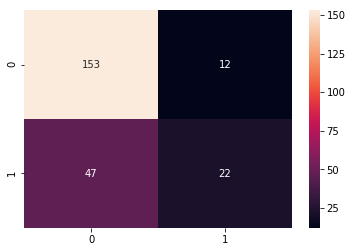

In [48]:
# Create Random Forest object
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

#Predict Output
rf_predicted = random_forest.predict(X_test)

random_forest_score = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_score_test = round(random_forest.score(X_test, y_test) * 100, 2)
random_forest_acc = accuracy_score(y_test,rf_predicted)

print('Random Forest Training Score: \n', random_forest_score)
print('Random Forest Test Score: \n', random_forest_score_test)
print('Accuracy: \n', random_forest_acc)
print('Confusion Matrix: \n',confusion_matrix(y_test,rf_predicted))
print('Classification Report: \n',classification_report(y_test,rf_predicted))

sns.heatmap(confusion_matrix(y_test,rf_predicted),annot=True,fmt="d")

##### Applying Hyperparameters 

In [49]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'n_estimators': range(1,200,10),
    'max_depth' : range(1,170,1),
    'min_samples_leaf' : range(1,50,1),
}

In [50]:
from sklearn.model_selection import RandomizedSearchCV
clf=RandomForestClassifier()
key = RandomizedSearchCV(estimator=clf,param_distributions=grid_param)
key.fit(X_train, y_train)
key.best_params_

{'n_estimators': 121,
 'min_samples_leaf': 47,
 'max_depth': 115,
 'criterion': 'entropy'}

In [51]:
clf = RandomForestClassifier(n_estimators=121,min_samples_leaf=47,max_depth= 115,criterion= 'entropy')
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test,y_pred)
# f1_score(y_test,y_pred)

0.7051282051282052

### Building Third Model using K-Nearest Neighbour


The optimal number of neighbors is 7.
KNN Classifier Training Score: 
 75.36
KNN Classifier Test Score: 
 73.08
Accuracy: 
 0.7307692307692307
Confusion Matrix: 
 [[150  15]
 [ 48  21]]
Classification Report:
               precision    recall  f1-score   support

           1       0.76      0.91      0.83       165
           2       0.58      0.30      0.40        69

    accuracy                           0.73       234
   macro avg       0.67      0.61      0.61       234
weighted avg       0.71      0.73      0.70       234



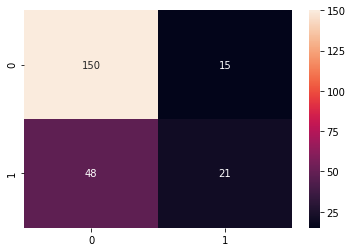

In [52]:
# KNN Model generation
from sklearn.neighbors import KNeighborsClassifier
# creating odd list of K for KNN
neighbors = list(range(1,20,2))
# empty list that will hold cv scores
cv_scores = []
from sklearn.model_selection import cross_val_score
#  10-fold cross validation , 9 datapoints will be considered for training and 
# 1 for cross validation (turn by turn) to determine value of k
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())   

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)

knn_classifier = KNeighborsClassifier(n_neighbors = optimal_k)
knn_classifier.fit(X_train, y_train)

#Predict Output
knn_predicted = knn_classifier.predict(X_test)

knn_classifier_score = round(knn_classifier.score(X_train, y_train) * 100, 2)
knn_classifier_score_test = round(knn_classifier.score(X_test, y_test) * 100, 2)
knn_classifier_acc = accuracy_score(y_test,knn_predicted)

print('KNN Classifier Training Score: \n', knn_classifier_score)
print('KNN Classifier Test Score: \n', knn_classifier_score_test)
print('Accuracy: \n', knn_classifier_acc)
print('Confusion Matrix: \n',confusion_matrix(y_test,knn_predicted))
print('Classification Report:\n',classification_report(y_test,knn_predicted))

sns.heatmap(confusion_matrix(y_test,knn_predicted),annot=True,fmt="d")

## Model Evaluation

In [53]:
#We can now rank our evaluation of all the models to choose the best one for our problem.
models = pd.DataFrame({
    'Model': [ 'Logistic Regression', 'Random Forest Classifier', 'KNN Classifier'],
    'Training Score': [ logreg_score,  random_forest_score,knn_classifier_score],
    'Test Score': [ logreg_score_test, random_forest_score_test, knn_classifier_score_test],
    'Accuracy': [ logreg_acc, random_forest_acc, knn_classifier_acc]})
models.sort_values(by='Test Score', ascending=False)

,Model,Training Score,Test Score,Accuracy
1,Random Forest Classifier,100.00,74.79,0.747863
2,KNN Classifier,75.36,73.08,0.730769
0,Logistic Regression,71.63,69.66,0.696581


## Feature Selection 
#### Search for any trends, relations & correlations

In [54]:
linear = linear_model.LinearRegression()
# Train the model using the training sets and check score
linear.fit(X_train, y_train)
#Predict Output
lin_predicted = linear.predict(X_test)

linear_score = round(linear.score(X_train, y_train) * 100, 2)
linear_score_test = round(linear.score(X_test, y_test) * 100, 2)

#Equation coefficient and Intercept
print('Linear Regression Training Score: \n', linear_score)
print('Linear Regression Test Score: \n', linear_score_test)
print('Coefficient: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)

from sklearn.feature_selection import RFE
rfe =RFE(linear, n_features_to_select=3)
rfe.fit(X,y)

Linear Regression Training Score: 
 10.57
Linear Regression Test Score: 
 10.52
Coefficient: 
 [-2.37339280e-03  9.86352744e-03 -4.12675187e-02 -1.66881221e-04
 -3.78214852e-04  5.41378290e-05 -5.69342015e-02  1.51288967e-01
 -1.67674875e-01  4.11372174e-02 -4.11372174e-02]
Intercept: 
 1.5625028576977165


RFE(estimator=LinearRegression(), n_features_to_select=3)

In [55]:
for i in range(len(rfe.ranking_)):
    if rfe.ranking_[i] == 1:
        print(X.columns.values[i])

Total_Protiens
Albumin
Gender_Male


In [56]:
#I'm considering seven important features based on recursive feature elimination
#finX = liver_df[['Age','Direct_Bilirubin','Total_Protiens','Albumin', 'Gender_Female', 'Gender_Male']]
finX = liver_df[['Total_Protiens','Albumin', 'Gender_Male']]
finX.head(4)

,Total_Protiens,Albumin,Gender_Male
0,6.8,3.3,0
1,7.5,3.2,1
2,7.0,3.3,1
3,6.8,3.4,1


In [57]:
X_train, X_test, y_train, y_test = train_test_split(finX, y, test_size=0.40, random_state=101)

### Drawing an inference

Logistic Regression Training Score: 
 72.21
Logistic Regression Test Score: 
 70.09
Coefficient: 
 [[-0.65406998  1.1573853  -0.56380772]]
Intercept: 
 [0.04339508]
Accuracy: 
 0.7008547008547008
Confusion Matrix: 
 [[159   6]
 [ 64   5]]
Classification Report: 
               precision    recall  f1-score   support

           1       0.71      0.96      0.82       165
           2       0.45      0.07      0.12        69

    accuracy                           0.70       234
   macro avg       0.58      0.52      0.47       234
weighted avg       0.64      0.70      0.61       234



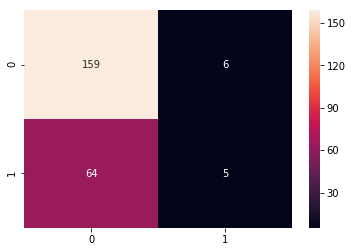

In [58]:
#Logistic Regression
logreg = LogisticRegression()
# Train the model using the training sets and check score
logreg.fit(X_train, y_train)
#Predict Output
log_predicted= logreg.predict(X_test)

logreg_score = round(logreg.score(X_train, y_train) * 100, 2)
logreg_score_test = round(logreg.score(X_test, y_test) * 100, 2)
#Equation coefficient and Intercept
print('Logistic Regression Training Score: \n', logreg_score)
print('Logistic Regression Test Score: \n', logreg_score_test)
print('Coefficient: \n', logreg.coef_)
print('Intercept: \n', logreg.intercept_)
print('Accuracy: \n', accuracy_score(y_test,log_predicted))
print('Confusion Matrix: \n', confusion_matrix(y_test,log_predicted))
print('Classification Report: \n', classification_report(y_test,log_predicted))

sns.heatmap(confusion_matrix(y_test,log_predicted),annot=True,fmt="d")
